In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [4]:
boston = load_boston()

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [16]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [20]:

regressor = DecisionTreeRegressor (random_state=0)

# cross validation 
# cv - the number of batches we want the sample to be splitted into
# for regression, the default returned scores are R^2 
cross_val_score(regressor, boston.data, boston.target, cv=10
               ,scoring = "neg_mean_squared_error"
               )

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

In [36]:
rng = np.random.RandomState(1)
x = np.sort(5*rng.rand(80,1), axis=0)
y = np.sin(x).ravel()
y[::5] += 3*(0.5 - rng.rand(y[::5].shape[0]))

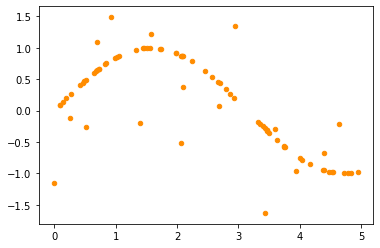

In [35]:
plt.figure()
plt.scatter(x,y,s=20,c='darkorange',label='data')
plt.show()

In [37]:
reg_1 = DecisionTreeRegressor(max_depth=2)
reg_2 = DecisionTreeRegressor(max_depth=5)
reg_1.fit(x,y)
reg_2.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [38]:
x_test = np.arange(0,5,0.01)[:,np.newaxis]

In [42]:
y_1 = reg_1.predict(x_test)
y_2 = reg_2.predict(x_test)

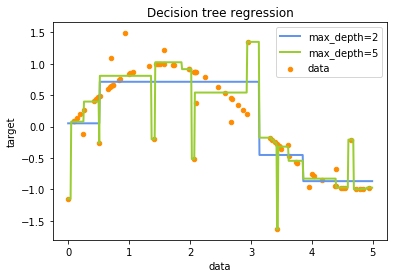

In [43]:
plt.figure()
plt.scatter(x,y,c='darkorange',label='data',s=20)
plt.plot(x_test,y_1,c='cornflowerblue',label='max_depth=2',linewidth=2)
plt.plot(x_test,y_2,c='yellowgreen',label='max_depth=5',linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision tree regression')
plt.legend()
plt.show()